<a href="https://colab.research.google.com/github/lovepreetmultani/DeepLearning/blob/main/CancerClassificationDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df=pd.read_csv("drive/My Drive/TensorFlow_FILES/DATA/cancer_classification.csv")

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

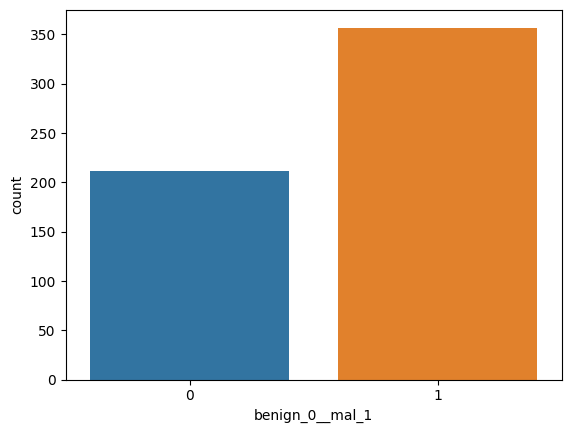

In [ ]:
sns.countplot(x='benign_0__mal_1', data=df) #checking that data is balanced or not

<Axes: >

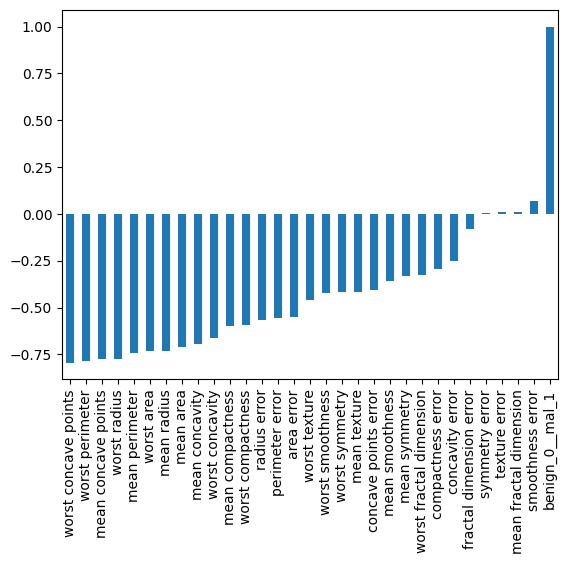

In [ ]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

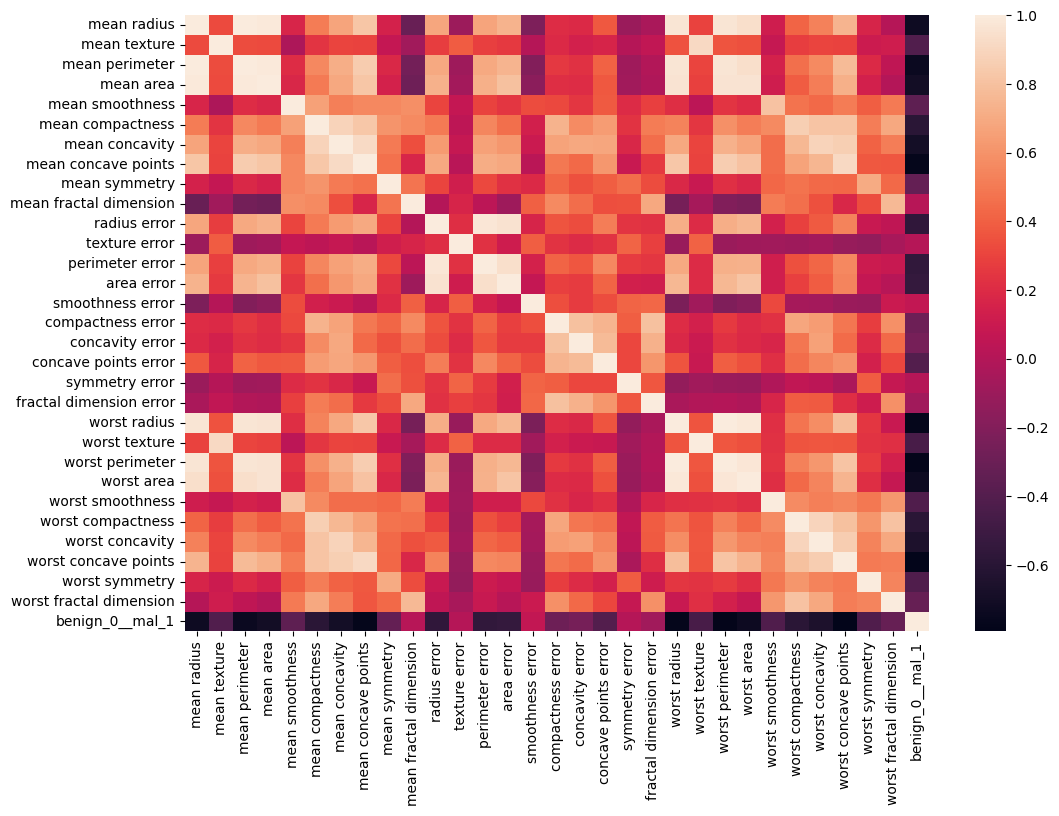

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [ ]:
X=df.drop('benign_0__mal_1',axis=1)
y=df['benign_0__mal_1']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(398, 30)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
  model = Sequential()
  model.add(Dense(units = 30, activation="relu"))
  model.add(Dense(units = 15, activation="relu"))
  model.add(Dense(units = 1,activation="sigmoid")) #Binary classification 0 or 1

  model.compile(optimizer = "adam", loss = "binary_crossentropy")

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=600)

Epoch 1/600
13/13 [==============================] - 1s 19ms/step - loss: 0.6523 - val_loss: 0.5478
Epoch 2/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4697 - val_loss: 0.4149
Epoch 3/600
13/13 [==============================] - 0s 6ms/step - loss: 0.3450 - val_loss: 0.3168
Epoch 4/600
13/13 [==============================] - 0s 7ms/step - loss: 0.2534 - val_loss: 0.2510
Epoch 5/600
13/13 [==============================] - 0s 7ms/step - loss: 0.1932 - val_loss: 0.2099
Epoch 6/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1550 - val_loss: 0.1847
Epoch 7/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1303 - val_loss: 0.1668
Epoch 8/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1114 - val_loss: 0.1541
Epoch 9/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0981 - val_loss: 0.1439
Epoch 10/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0882 - val_loss: 0.1375
Epoch 11

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

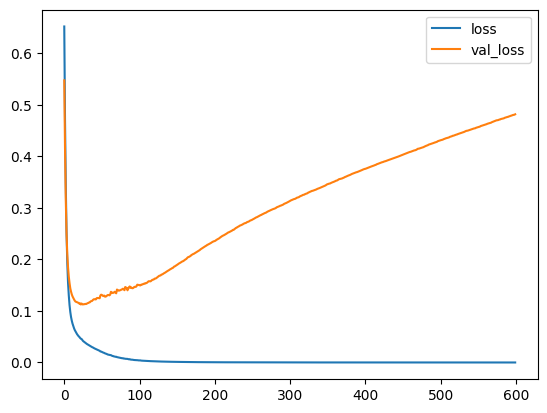

In [ ]:
losses.plot()

**To prevent overfitting**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 25)

In [ ]:
  model = Sequential()
  model.add(Dense(units = 30, activation="relu"))
  model.add(Dense(units = 15, activation="relu"))
  model.add(Dense(units = 1,activation="sigmoid")) #Binary classification 0 or 1

  model.compile(optimizer = "adam", loss = "binary_crossentropy")

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=600,
          callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 1s 18ms/step - loss: 0.5764 - val_loss: 0.5067
Epoch 2/600
13/13 [==============================] - 0s 6ms/step - loss: 0.4095 - val_loss: 0.3818
Epoch 3/600
13/13 [==============================] - 0s 6ms/step - loss: 0.2964 - val_loss: 0.3043
Epoch 4/600
13/13 [==============================] - 0s 5ms/step - loss: 0.2253 - val_loss: 0.2546
Epoch 5/600
13/13 [==============================] - 0s 7ms/step - loss: 0.1806 - val_loss: 0.2198
Epoch 6/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1502 - val_loss: 0.1969
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1287 - val_loss: 0.1807
Epoch 8/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1118 - val_loss: 0.1684
Epoch 9/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0988 - val_loss: 0.1600
Epoch 10/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0876 - val_loss: 0.1538
Epoch 11

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

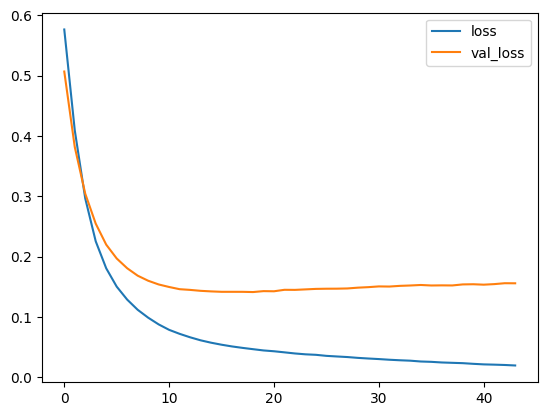

In [ ]:
losses.plot()

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
  model = Sequential()

  model.add(Dense(units = 30, activation="relu"))
  model.add(Dropout(0.5))

  model.add(Dense(units = 15, activation="relu"))
  model.add(Dropout(0.5))

  model.add(Dense(units = 1,activation="sigmoid")) #Binary classification 0 or 1

  model.compile(optimizer = "adam", loss = "binary_crossentropy")

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=600,
          callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 1s 17ms/step - loss: 0.8764 - val_loss: 0.6162
Epoch 2/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6494 - val_loss: 0.4929
Epoch 3/600
13/13 [==============================] - 0s 7ms/step - loss: 0.5548 - val_loss: 0.4153
Epoch 4/600
13/13 [==============================] - 0s 6ms/step - loss: 0.4857 - val_loss: 0.3564
Epoch 5/600
13/13 [==============================] - 0s 5ms/step - loss: 0.4090 - val_loss: 0.3102
Epoch 6/600
13/13 [==============================] - 0s 7ms/step - loss: 0.3700 - val_loss: 0.2751
Epoch 7/600
13/13 [==============================] - 0s 7ms/step - loss: 0.3393 - val_loss: 0.2485
Epoch 8/600
13/13 [==============================] - 0s 5ms/step - loss: 0.2953 - val_loss: 0.2252
Epoch 9/600
13/13 [==============================] - 0s 6ms/step - loss: 0.2908 - val_loss: 0.2041
Epoch 10/600
13/13 [==============================] - 0s 8ms/step - loss: 0.2914 - val_loss: 0.1875
Epoch 11

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

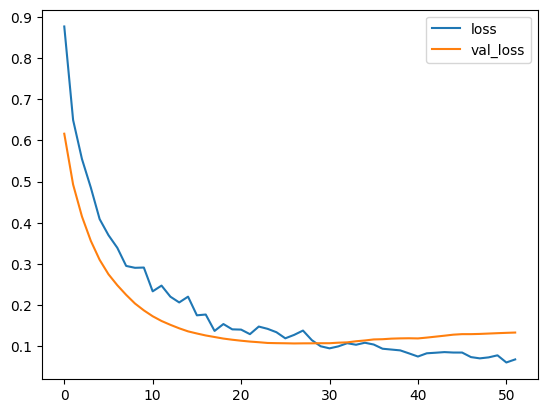

In [ ]:
losses.plot()

In [ ]:
test_predictions=np.argmax(model.predict(X_test),axis=1)

6/6 [==============================] - 0s 2ms/step


In [ ]:
test_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.39      1.00      0.56        66
           1       0.00      0.00      0.00       105

    accuracy                           0.39       171
   macro avg       0.19      0.50      0.28       171
weighted avg       0.15      0.39      0.21       171



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_test, test_predictions))

[[ 66   0]
 [105   0]]
